# Les librairies

In [217]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Chargement des données

In [218]:
data = pd.read_csv("../Data/Data_vi_marketing_campaigns.csv")
data.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Is_parent,Household,Age,Seniority,Total_Spent,Total_Accepted_Campaigns
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,4,7,0,1,Not Parent,1,57,2,1617,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,2,5,0,0,Parent,3,60,0,27,0


L'objectif de ce notebook est de réaliser une **analyse exploratoire des données client** afin de mieux comprendre leurs caractéristiques et comportements.  Cette analyse sera structurée en deux parties principales :

- Profil sociodémographique des clients
- Comportement d'achat des clients

L'analyse graphique nous aidera à visualiser ces informations et à découvrir des schémas sous-jacents, facilitant ainsi la segmentation client et l'optimisation des actions commerciales.


# 1. Profil sociodémographique des clients.

## 1.1. Age des clients

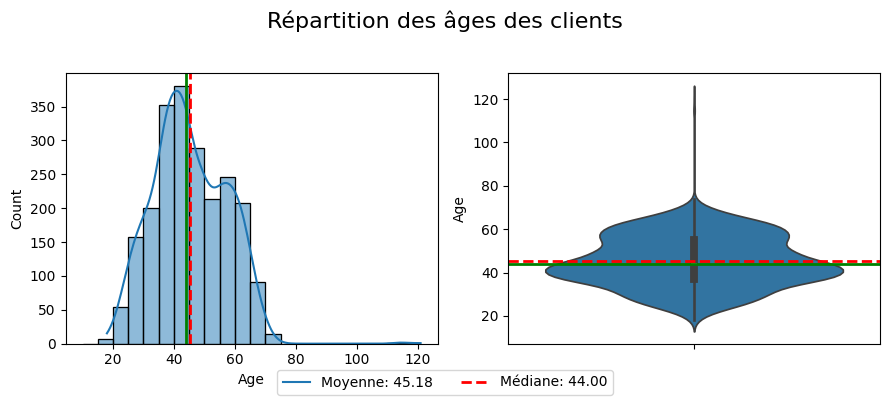

In [219]:
bins = np.arange(10, data.Age.max(), 5) 
mean_age, median_age = data.Age.mean(), data.Age.median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.histplot(data=data, x="Age", kde=True, bins=bins, ax=axes[0])
axes[0].axvline(mean_age, color='r', linestyle='--', linewidth=2)
axes[0].axvline(median_age, color='g', linestyle='-', linewidth=2)

sns.violinplot(data=data, y="Age", ax=axes[1])
axes[1].axhline(mean_age, color='r', linestyle='--', linewidth=2)
axes[1].axhline(median_age, color='g', linestyle='-', linewidth=2)

plt.suptitle('Répartition des âges des clients', fontsize=16)
fig.legend([f'Moyenne: {mean_age:.2f}', f'Médiane: {median_age:.2f}'], loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

plt.show()
del mean_age, median_age

Les clients sont en moyenne agés de 45 ans. On remarque cependant que très peu de clients ont plus de 75 ans.

In [130]:
print(f"""Il y a {(data.Age > 75).sum()} clients qui ont plus de 75 ans et les âges calculés sont {",".join(data[data.Age > 75]["Age"].astype(str))}.""")

Il y a 3 clients qui ont plus de 75 ans et les âges calculés sont 114,121,115.


> Ces valeurs extrêmes soulèvent des doutes quant à leur validité, suggérant qu'elles pourraient être le résultat d'erreurs dans les données. Afin d'écarter tout doute, le choix est fait de les supprimer.

In [5]:
data = data[~(data.Age > 75)]
data.shape

(2213, 23)

## 1.2. Niveau d'étude des clients et leurs revenus

### 1.2.1. Niveau d'étude des clients

In [263]:
def add_annotation(ax, data, percent=True):
    for p in ax.patches:
        height = p.get_height()
        if percent:
            # Affiche le total et le pourcentage
            ax.annotate(f'{int(height)} ({height/len(data):.1%})', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10)
        else:
            # Affiche uniquement le total
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10)


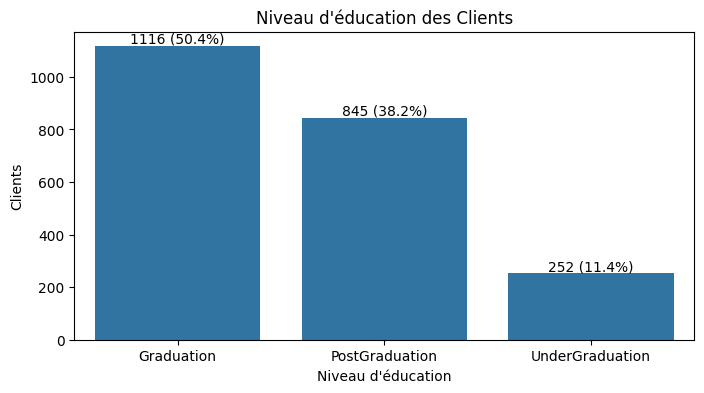

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, x="Education")
add_annotation(ax, data)
plt.title("Niveau d'éducation des Clients")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Clients")
plt.show()

> La majorité des clients ont le niveau `graduation` (1116, 50.4 % du total). Le niveau d'étude `Post-graduation` - regroupant ceux qui ont eu un master et ceux qui sont PhD - suit avec **845 clients** (38.2 %). Les clients avec un niveau `Undergraduation` sont au nombre de **252** (11.5 %) et sont relativement sous-représentés.


### 1.2.2. Répartition des revenus des clients

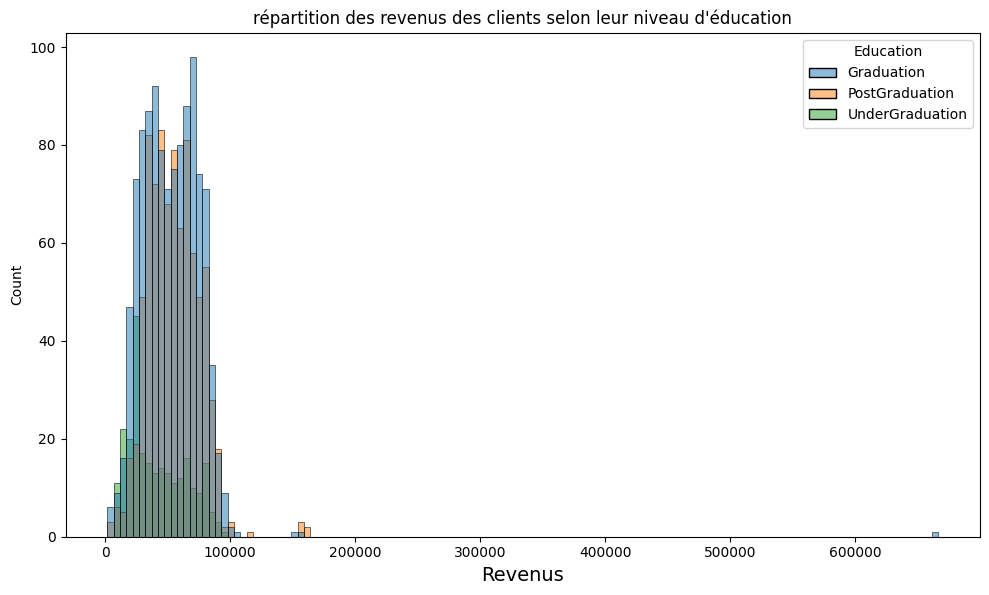

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.histplot(x=data['Income'], data=data, hue = 'Education')
plt.title("répartition des revenus des clients selon leur niveau d'éducation")
plt.tight_layout()
plt.xlabel("Revenus", fontsize=14)
plt.show()

## 1.3. Situation familiale des clients

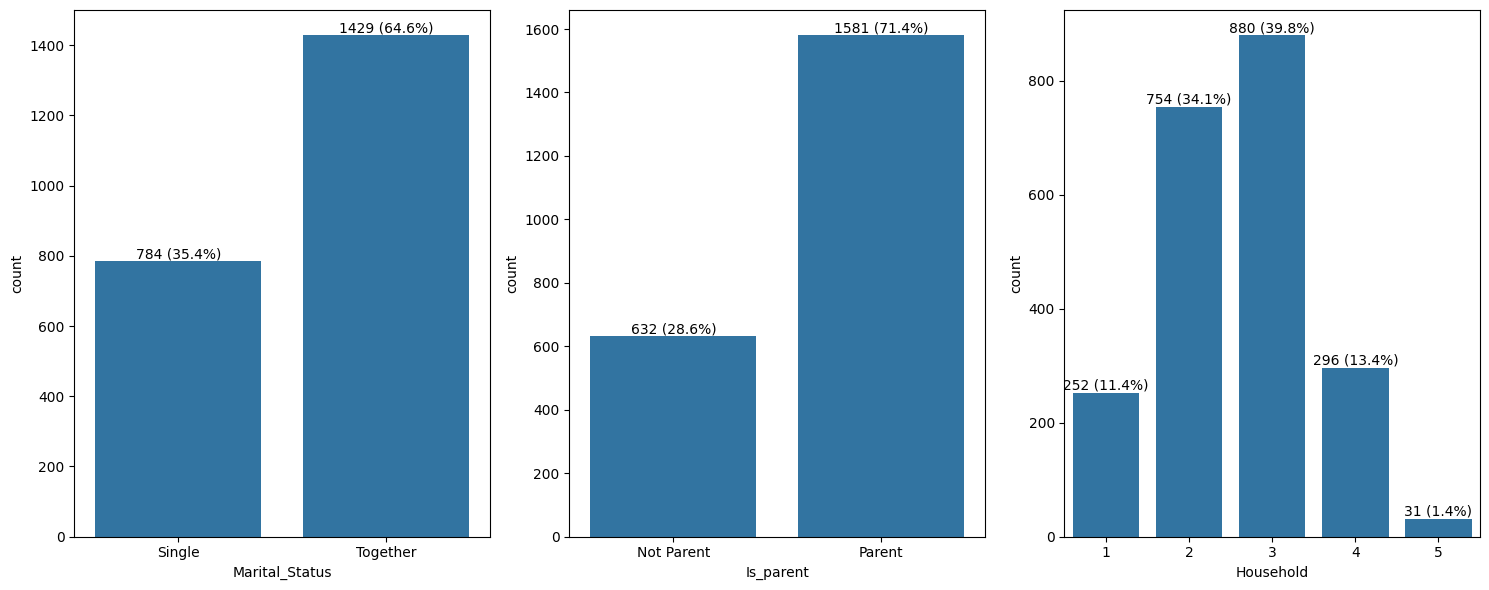

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=data, x="Marital_Status")
add_annotation(ax, data)
plt.subplot(1, 3, 2)
ax = sns.countplot(data=data, x="Is_parent")
add_annotation(ax, data)
plt.subplot(1, 3, 3)
ax = sns.countplot(data=data, x="Household")
add_annotation(ax, data)
plt.tight_layout()

>Cette visualisation montre comment la clientèle est répartie selon le `statut marital`, le `statut parental` et la `taille du foyer`.<br>
64.6 % des clients sont en couple, tandis que 35.4 % sont célibataires. Cela indique une forte présence de couples dans l'échantillon de données.  71.4 % des clients sont des parents, tandis que 28.6 % ne le sont pas. Cela suggère une prédominance de familles parmi la clientèle.<br>
Les foyers de 2 et 3 personnes représentent la majorité des cas, avec respectivement 34.1 % et 39.8 %. En revanche, les foyers d'une seule personne ou de 4 personnes et plus sont moins fréquents. Ces résultats confirment que la clientèle est principalement composée de familles, et que seule 11.4% des clients vivent seuls.


## 1.4. Ancienneté et récence des clients

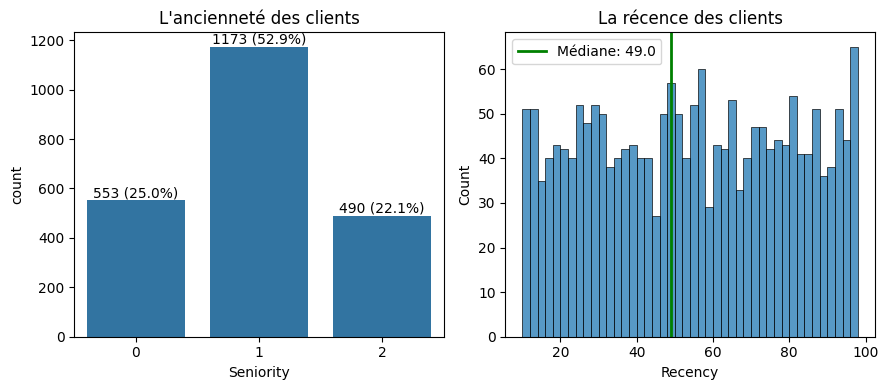

In [262]:
plt.subplots(1, 2, figsize=(9, 4))
plt.subplot(1,2,1)
ax = sns.countplot(data=data, x="Seniority")
add_annotation(ax, data)
plt.title("L'ancienneté des clients")
plt.subplot(1,2,2)
bins = np.arange(10, data.Recency.max(), 2) 
ax = sns.histplot(data=data, x="Recency", bins=bins)
plt.axvline(data.Recency.median(), color='g', linestyle='-', linewidth=2, label=f'Médiane: {data.Recency.median()}')
plt.legend()
plt.title("La récence des clients")
plt.tight_layout()
plt.show()

>Les données ayant été collectées en 2014, on observe que 25 % des clients ont moins d'un an d'ancienneté. En revanche, plus de la moitié des clients sont inscrits depuis plus d'un an, et 22,1 % depuis deux ans.<br>
En ce qui concerne la récence, aucune différence significative n’est notée. Il existe une concentration autour de 24 à 30 jours de récence, ce qui suggère un comportement d'achat relativement régulier parmi la clientèle. De plus, la majorité des clients reviennent acheter après 49 jours.

## 2.  Comportement des clients (Interactions et habitudes d'achat)

### 2.1. Dépenses totales par catégorie de produit (vin, fruits, viande, poisson, sucreries, or)

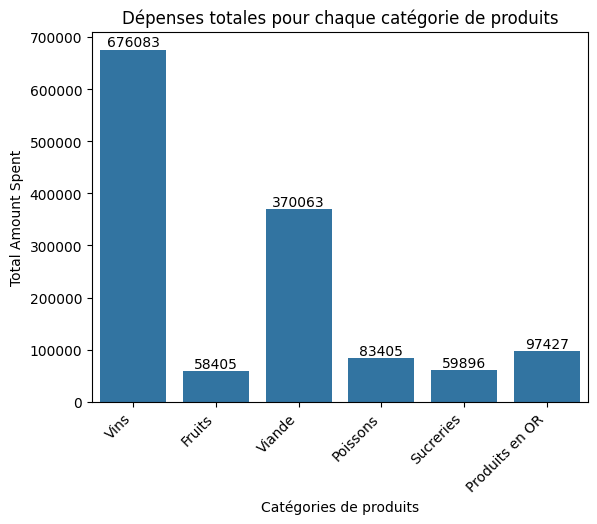

In [273]:
vars_ = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
vars_names = ["Vins", "Fruits", "Viande", "Poissons", "Sucreries", "Produits en OR" ]
ax = sns.barplot(x = vars_names, y=data[vars_].sum().values)
add_annotation(ax, data, percent=False)
plt.xticks(rotation=45, ha='right')
plt.title("Dépenses totales pour chaque catégorie de produits")
plt.xlabel("Catégories de produits")
plt.ylabel("Total Amount Spent")
plt.show()


>La catégorie des `vins` domine nettement avec un total de `676 083`, ce qui suggère une forte demande pour ce produit parmi la clientèle. Viennent ensuite les achats de `viande` avec `370 063`. Ces deux produits sont les plus demandées et donc les plus achetés.<br><br>
Les `fruits` et les `produits sucrés` sont des catégories de produits les moins achetés, avec respectivement `58 405` et `59 896` en termes d'achats. Enfin, les `produits en or`  atteignent `97 427`, indiquant un intérêt modéré pour cette catégorie non-alimentaire. <br><br>
Cette analyse sommaire montre que les clients ont une préférence marquée pour les vins et les viandes, tandis que les autres catégories ont une part plus restreinte des dépenses globales.

### 2.2. Les modes d'achats des clients

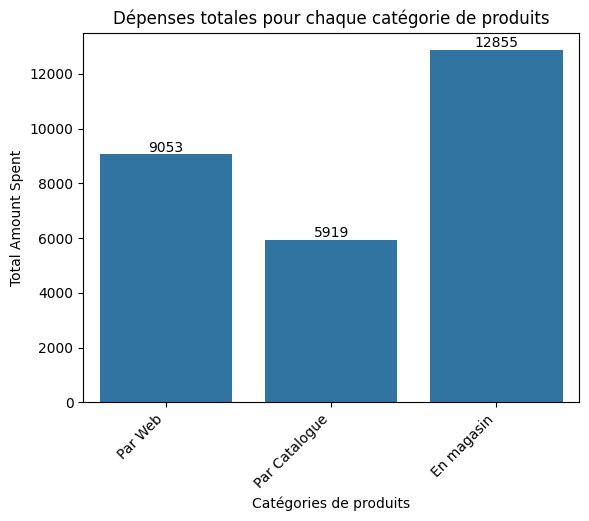

In [276]:
vars_ = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
vars_names = ["Par Web", "Par Catalogue", "En magasin"]
ax = sns.barplot(x = vars_names, y=data[vars_].sum().values)
add_annotation(ax, data, percent=False)
plt.xticks(rotation=45, ha='right')
plt.title("Dépenses totales pour chaque catégorie de produits")
plt.xlabel("Catégories de produits")
plt.ylabel("Total Amount Spent")
plt.show()

Les données concernant les modes d'achats montrent que la majorité des achats sont effectués en magasin (`NumStorePurchases`), avec un total de `12 855`. Cela indique que les clients préfèrent largement faire leurs achats en personne. Les achats via le site web (`NumWebPurchases`) représentent un total de `9 053`, un mode d'achat également populaire, mais moins fréquent que les achats en magasin.

Enfin, les achats via catalogue (`NumCatalogPurchases`) sont les moins fréquents, avec `5 919`. Cela suggère que ce mode est moins utilisé par rapport aux achats en ligne ou en magasin, possiblement en raison de la montée du commerce électronique qui rend les catalogues moins attractifs pour les clients. En somme, bien que les magasins restent le canal principal, les achats en ligne jouent un rôle important, et les catalogues sont en perte de vitesse.


La plupart des clients ont au moins une fois effectué un achat suite à une réduction. 

### 3. Dépenses totales des clients ayant accepté des campagnes marketing (Total_Accepted_Campaigns)

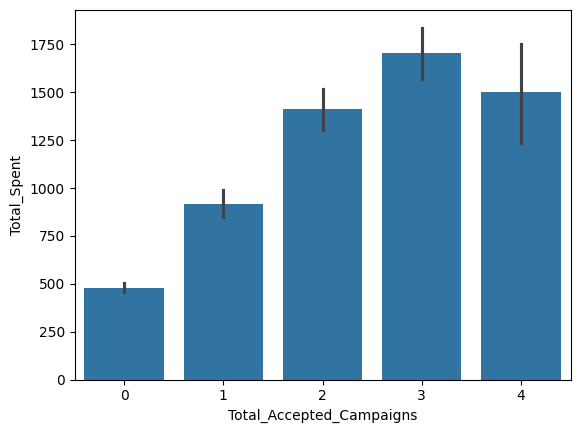

In [147]:
sns.barplot(y=data['Total_Spent'], x=data['Total_Accepted_Campaigns'])
plt.show()

In [138]:
if (data['Total_Accepted_Campaigns'] != "0").any():  # Vérifie si au moins une valeur n'est pas "0"
    print(data['Total_Spent'].sum())

1345279
